<a href="https://colab.research.google.com/github/FahimS45/ML_projects/blob/main/NeuroBoost_Precision_A_Deep_Dive_into_Boosting_and_ANN_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NeuroBoost Precision: A Deep Dive into Boosting and ANN Dynamics**
Dataset taken for this project from [here](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

Algorithms analyzed:

*   Decision Tree
*   Random Forest
*   AdaBoost
*   LightGBM
*   Gradient Boosting
*   XGBoost
*   Artificial Neural Network (ANN)


# **Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

rand = 50

In [ ]:
diabetes = pd.read_csv("diabetes_data.csv")

In [ ]:
diabetes_df = pd.DataFrame(diabetes)

# **EDA**

In [ ]:
diabetes_df.head(5).T

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
missing_data = diabetes_df.isnull()
result = missing_data.sum()
result

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
diabetes_df.shape

(768, 9)

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_df['Age'].nunique()

52

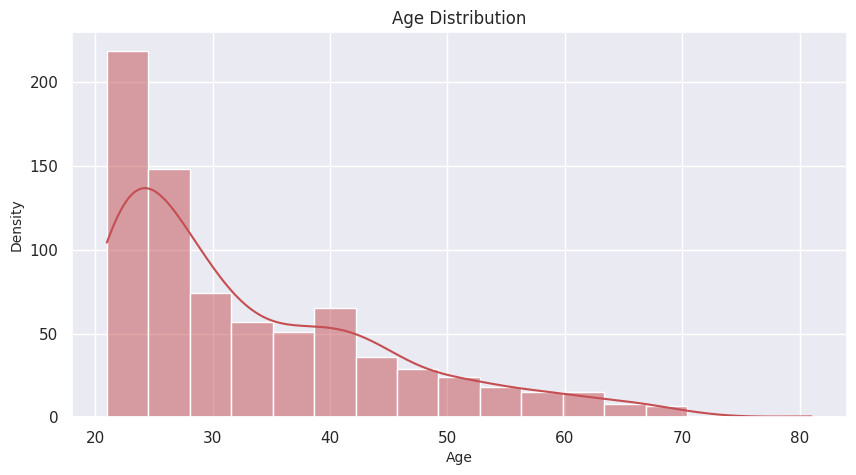

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_theme(style='darkgrid')

sns.histplot(diabetes_df['Age'], color='r', kde=True)
plt.title('Age Distribution', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Density', fontsize=10)

plt.show()

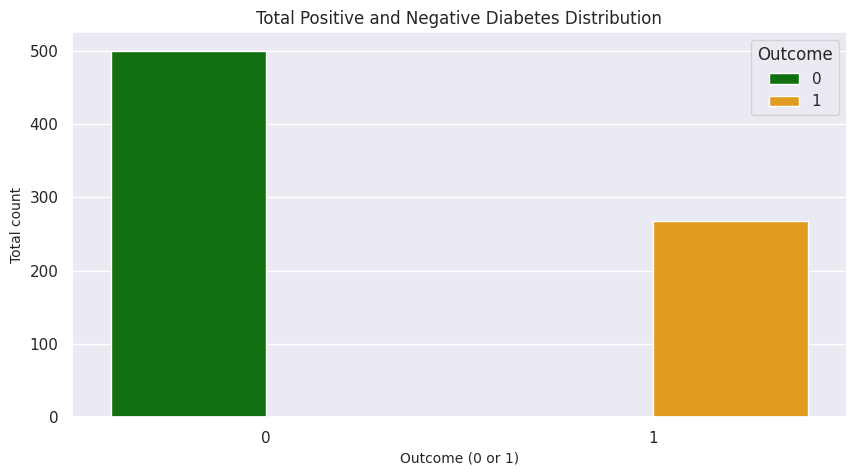

In [ ]:
plt.figure(figsize=(10, 5))

sns.countplot(x='Outcome', data=diabetes_df, hue='Outcome', palette={0: 'green', 1: 'orange'})
plt.title('Total Positive and Negative Diabetes Distribution', fontsize=12)
plt.xlabel('Outcome (0 or 1)', fontsize=10)
plt.ylabel('Total count', fontsize=10)
plt.show()

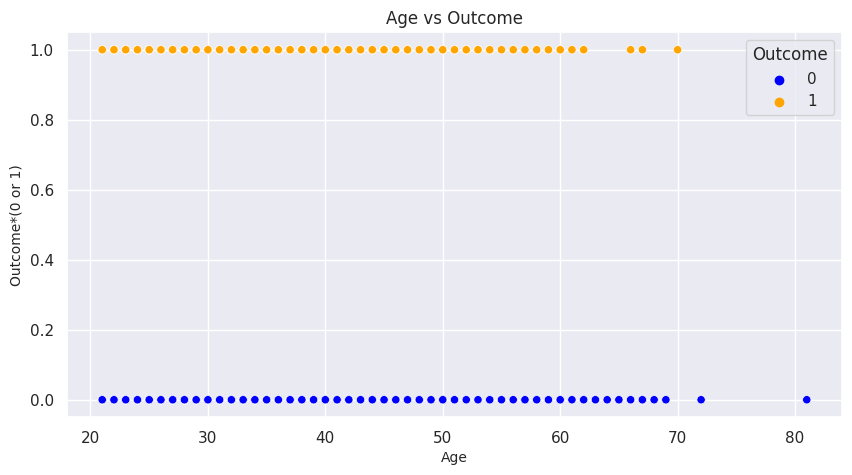

In [ ]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='Age', y='Outcome', data=diabetes_df, hue='Outcome', marker='o', palette={0: 'blue', 1: 'orange'})
plt.title('Age vs Outcome', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Outcome*(0 or 1)', fontsize=10)

plt.show()

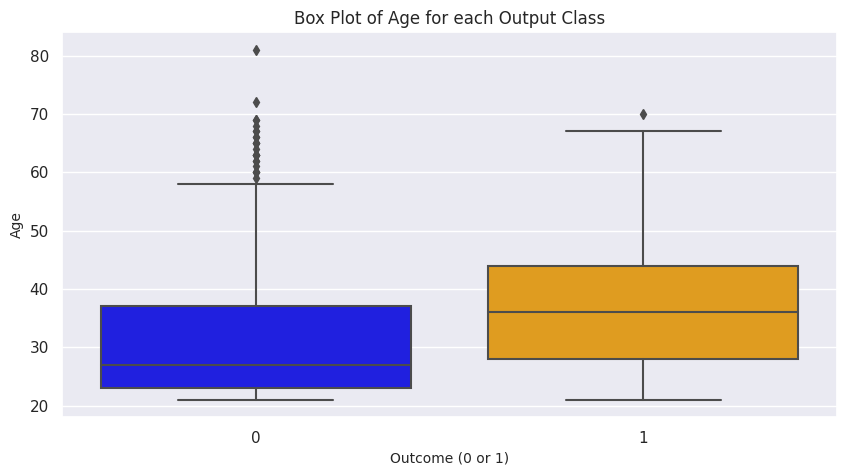

In [ ]:
plt.figure(figsize=(10, 5))

sns.boxplot(x='Outcome', y='Age', data=diabetes_df, palette={0: 'blue', 1: 'orange'})
plt.title('Box Plot of Age for each Output Class', fontsize=12)
plt.xlabel('Outcome (0 or 1)', fontsize=10)
plt.ylabel('Age', fontsize=10)
plt.show()

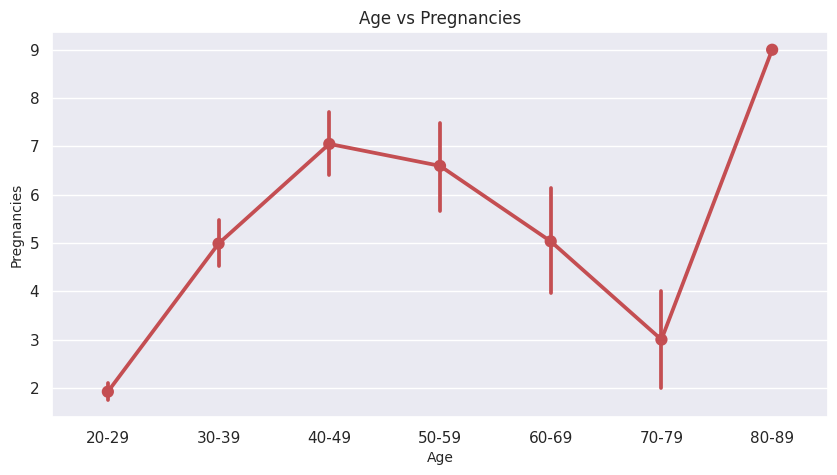

In [ ]:
plt.figure(figsize=(10,5))

age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

diabetes_df['Age Group'] = pd.cut(diabetes_df['Age'], bins=age_bins, labels=age_labels, right=False)

sns.pointplot(x='Age Group', y='Pregnancies', data=diabetes_df, color='r')
plt.title('Age vs Pregnancies', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Pregnancies', fontsize=10)

plt.show()

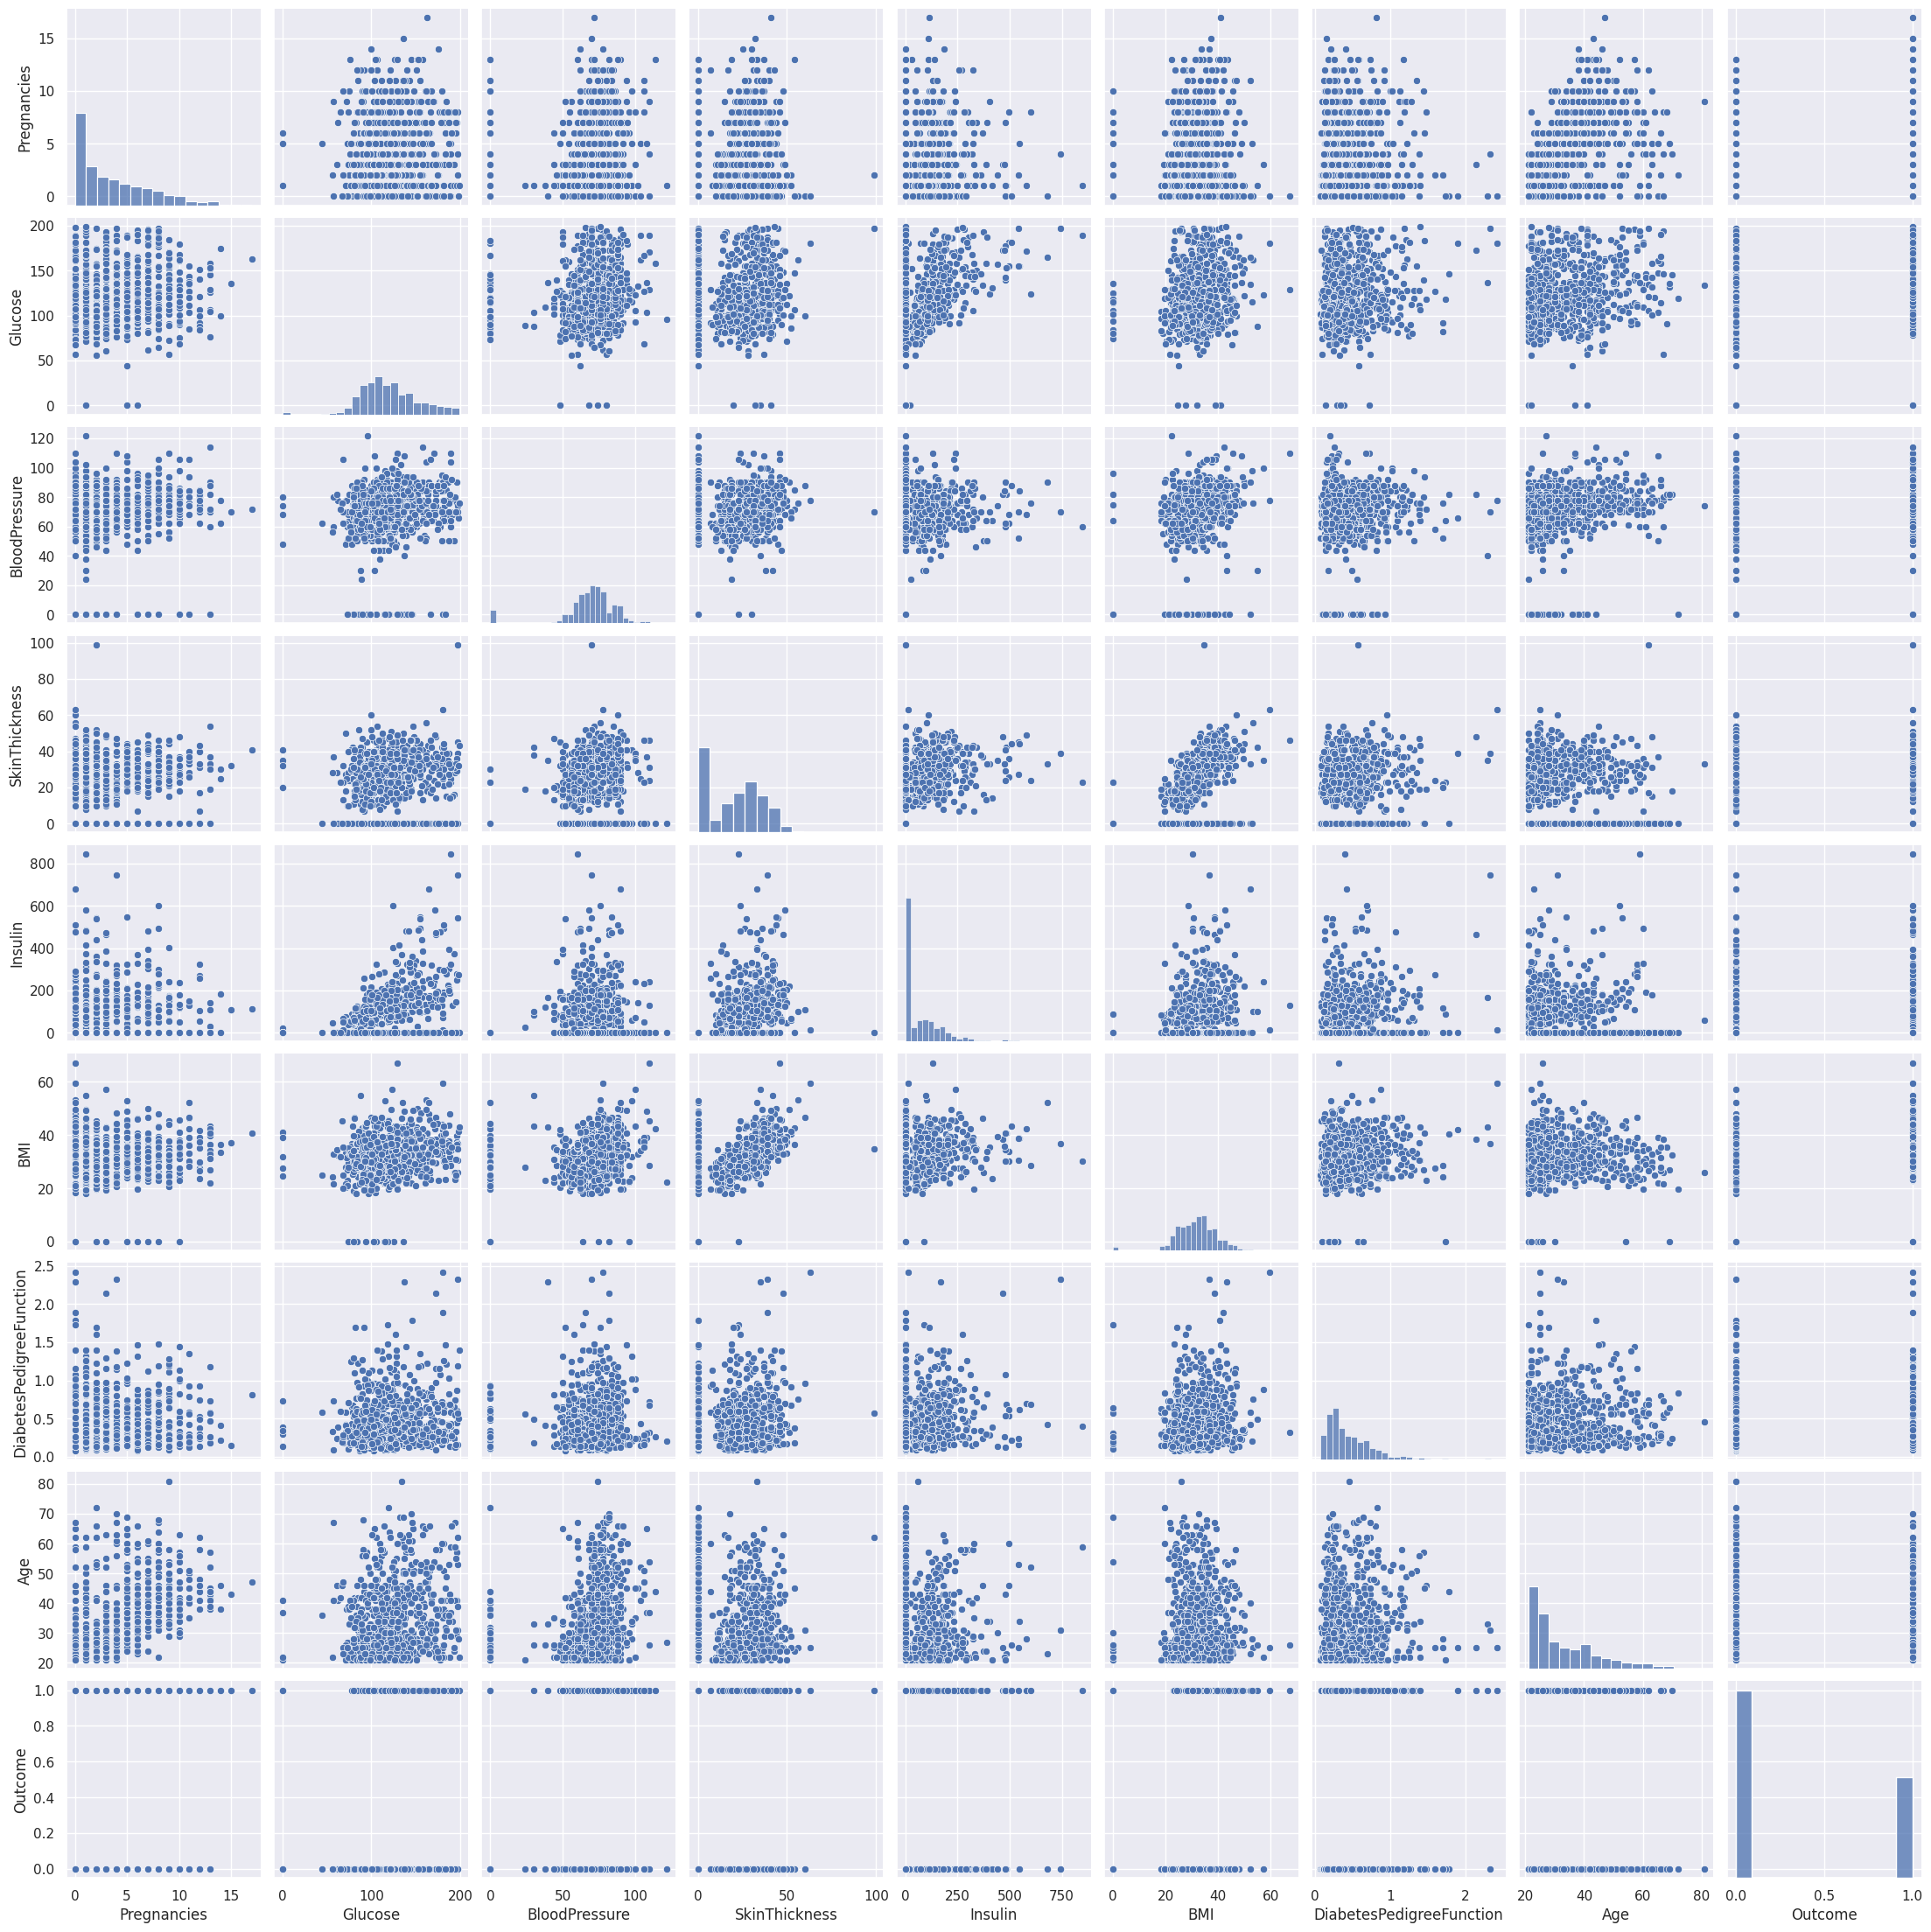

In [ ]:
sns.pairplot(diabetes_df)

plt.show()

In [ ]:
corr = diabetes_df.corr()

corr


<ipython-input-17-0ee7d025894b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = diabetes_df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


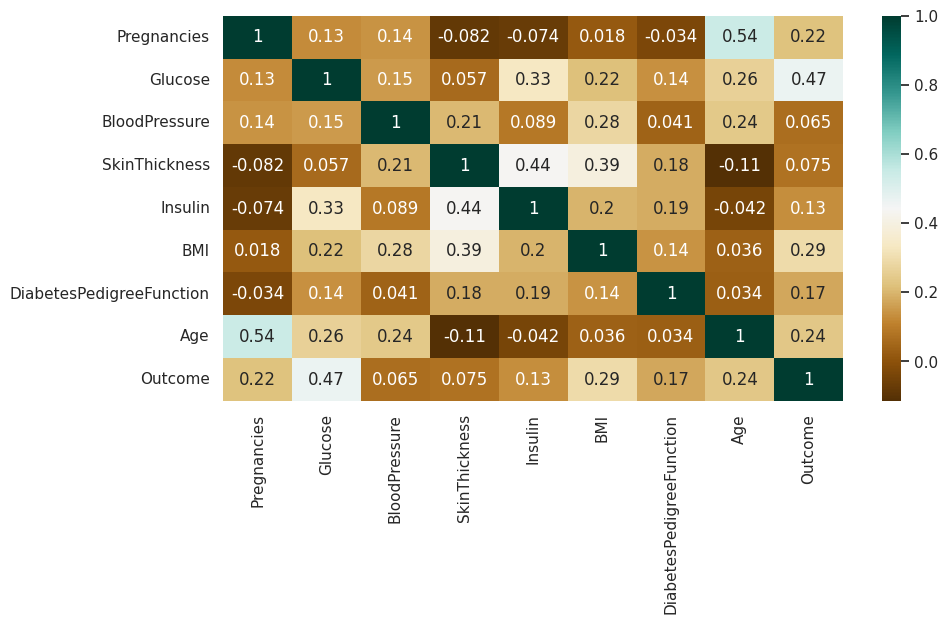

In [ ]:
plt.figure(figsize=(10,5))

sns.heatmap(corr, cmap='BrBG', annot=True)

plt.show()

In [ ]:
previous_num_cols = diabetes_df.shape[1]
print(previous_num_cols)
diabetes_df = diabetes_df.drop('Age Group', axis=1)
diabetes_df

10


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand)

print(f'Training data shape:{X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape:(614, 8)
Test data shape: (154, 8)


# **Decision Tree**


In [ ]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
param_grid = {
    'max_depth': [2, 3, 5, 7],
    'min_samples_split': [2, 4, 20, 50]
}

DTC_model = DecisionTreeClassifier(random_state=rand)

grid_search = GridSearchCV(DTC_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

random_search = RandomizedSearchCV(DTC_model, param_grid, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=50),
                   param_distributions={'max_depth': [2, 3, 5, 7],
                                        'min_samples_split': [2, 4, 20, 50]},
                   scoring='accuracy')

In [ ]:
print(f"Best Hyperparameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Hyperparameters from RandomizedSearchCV: {random_search.best_params_}")

Best Hyperparameters from GridSearchCV: {'max_depth': 5, 'min_samples_split': 50}
Best Hyperparameters from RandomizedSearchCV: {'min_samples_split': 50, 'max_depth': 3}


In [ ]:
best_params_DTC = grid_search.best_params_

best_DTC_model = DecisionTreeClassifier(**best_params_DTC, random_state=rand)
best_DTC_model.fit(X_train, y_train)


prediction_train = best_DTC_model.predict(X_train)
prediction = best_DTC_model.predict(X_test)
accuracy_DTC_training = accuracy_score(y_train, prediction_train)
accuracy_DTC = accuracy_score(y_test, prediction)
print(f"Accuracy on training data: {accuracy_DTC_training:.2f}")
print(f"Accuracy: {accuracy_DTC:.2f}")

Accuracy on training data: 0.82
Accuracy: 0.73


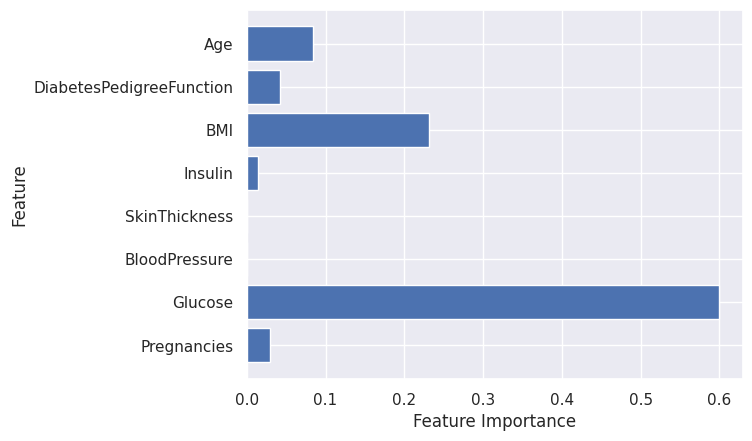

In [ ]:
def plot_feature_importances_custom(model, feature_names):
    n_features = len(feature_names)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")

custom_feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plot_feature_importances_custom(best_DTC_model, custom_feature_names)

# **Random Forest**

In [ ]:
param_grid = {
    'max_depth': [2, 3, 5, 7],
    'min_samples_split': [2, 4, 20, 50],
    'n_estimators': [10, 50, 100, 200]
}

Rand_Forest_model = RandomForestClassifier(random_state=rand)

grid_search = GridSearchCV(Rand_Forest_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

random_search = RandomizedSearchCV(Rand_Forest_model, param_grid, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=50),
                   param_distributions={'max_depth': [2, 3, 5, 7],
                                        'min_samples_split': [2, 4, 20, 50],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='accuracy')

In [ ]:
print(f"Best Hyperparameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Hyperparameters from RandomizedSearchCV: {random_search.best_params_}")

Best Hyperparameters from GridSearchCV: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}
Best Hyperparameters from RandomizedSearchCV: {'n_estimators': 100, 'min_samples_split': 20, 'max_depth': 7}


In [ ]:
best_params_RF = grid_search.best_params_

best_model_RF = RandomForestClassifier(**best_params_RF, random_state=rand)
best_model_RF.fit(X_train, y_train)

prediction = best_model_RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, prediction)
print(f'Accuracy of RF: {accuracy_RF:.2f}')

Accuracy of RF: 0.70


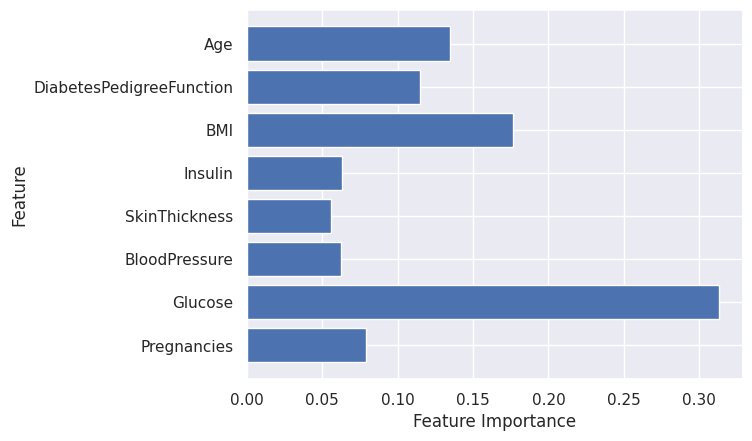

In [ ]:
custom_feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plot_feature_importances_custom(best_model_RF, custom_feature_names)

# **AdaBoost**

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001, 0]
}

Ada_B_model = AdaBoostClassifier(random_state=rand)

grid_search = GridSearchCV(Ada_B_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

random_search = RandomizedSearchCV(Ada_B_model, param_grid, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py", line 124, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skle

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=50),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001, 0],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='accuracy')

In [ ]:
print(f"Best Hyperparameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Hyperparameters from RandomizedSearchCV: {random_search.best_params_}")

Best Hyperparameters from GridSearchCV: {'learning_rate': 0.1, 'n_estimators': 100}
Best Hyperparameters from RandomizedSearchCV: {'n_estimators': 50, 'learning_rate': 0.1}


In [ ]:
best_params_Ada_B = grid_search.best_params_

best_model_Ada_B = AdaBoostClassifier(**best_params_Ada_B, random_state=rand)
best_model_Ada_B.fit(X_train, y_train)

prediction = best_model_Ada_B.predict(X_test)
accuracy_Ada = accuracy_score(y_test, prediction)
print(f'Accuracy of Ada_B: {accuracy_Ada:.2f}')

Accuracy of Ada_B: 0.75


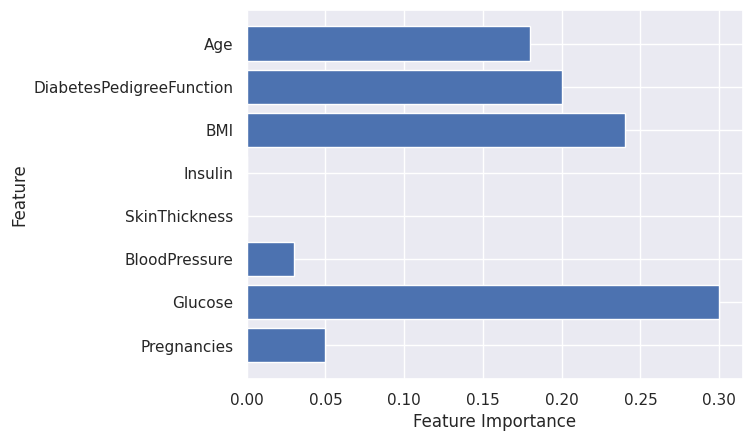

In [ ]:
custom_feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plot_feature_importances_custom(best_model_Ada_B, custom_feature_names)

# **LightGBM**

In [ ]:
param_grid = {
    'max_depth': [2, 3, 5, 7],
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001, 0]
}

lgb_model = lgb.LGBMClassifier(random_state=rand, force_col_wise=True)

grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

random_search = RandomizedSearchCV(lgb_model, param_grid, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1142, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 842, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 255, in train
    boos

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 215, number of negative: 399
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350163 -> initscore=-0.618323
[LightGBM] [Info] Start training from score -0.618323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1142, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 842, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 255, in train
    boost

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(force_col_wise=True,
                                            random_state=50),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001, 0],
                                        'max_depth': [2, 3, 5, 7],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='accuracy')

In [ ]:
print(f"Best Hyperparameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Hyperparameters from RandomizedSearchCV: {random_search.best_params_}")

Best Hyperparameters from GridSearchCV: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
Best Hyperparameters from RandomizedSearchCV: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}


In [ ]:
best_params_lgb = grid_search.best_params_

best_model_lgb = lgb.LGBMClassifier(**best_params_lgb, random_state=rand, force_col_wise=True, verbose=0)
best_model_lgb.fit(X_train, y_train)

prediction = best_model_lgb.predict(X_test)
accuracy_lgb = accuracy_score(y_test, prediction)
print(f'Accuracy of lgb: {accuracy_lgb:.2f}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

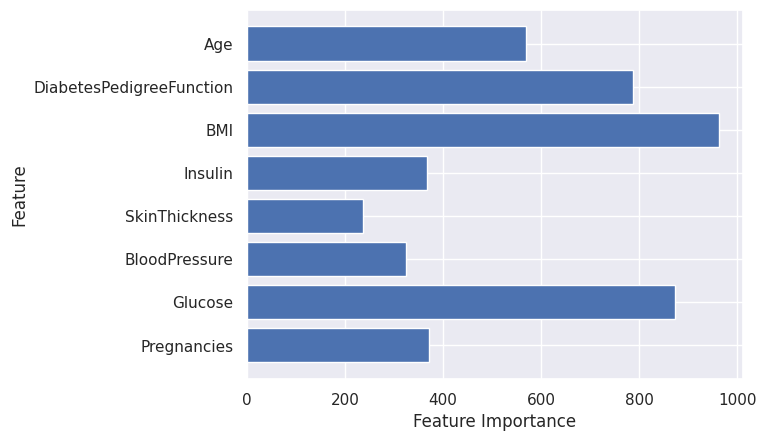

In [ ]:
custom_feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plot_feature_importances_custom(best_model_lgb, custom_feature_names)

# **Gradient Boosting**

In [ ]:
param_grid = {
    'max_depth': [2, 3, 5, 7],
    'min_samples_split': [2, 4, 20, 50],
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001, 0]
}

gb_model = GradientBoostingClassifier(random_state=rand)

grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

random_search = RandomizedSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=50),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001, 0],
                                        'max_depth': [2, 3, 5, 7],
                                        'min_samples_split': [2, 4, 20, 50],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='accuracy')

In [ ]:
print(f"Best Hyperparameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Hyperparameters from RandomizedSearchCV: {random_search.best_params_}")

Best Hyperparameters from GridSearchCV: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
Best Hyperparameters from RandomizedSearchCV: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 2, 'learning_rate': 0.1}


In [ ]:
best_params_gb = grid_search.best_params_

best_model_gb = GradientBoostingClassifier(**best_params_gb, random_state=rand, verbose=0)
best_model_gb.fit(X_train, y_train)

prediction = best_model_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, prediction)
print(f'Accuracy of gb: {accuracy_gb:.2f}')

Accuracy of gb: 0.69


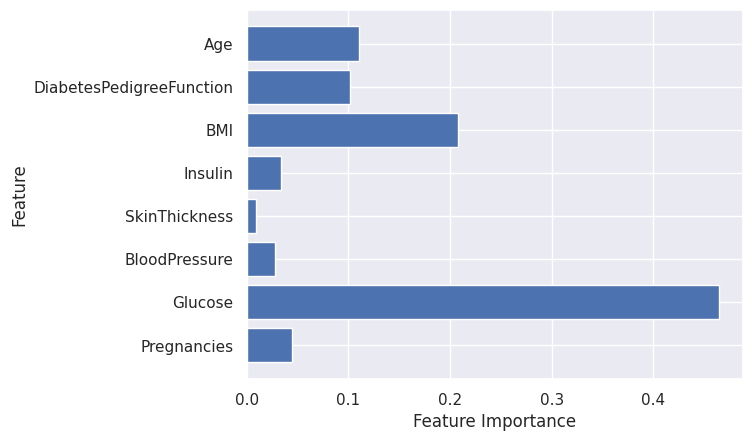

In [ ]:
custom_feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plot_feature_importances_custom(best_model_gb, custom_feature_names)

# **XGBoost (Extreme Gradient Boosting)**

In [ ]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.3, random_state=rand)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=rand)

print(f'Training (xgb) data shape:{X_train.shape}')
print(f'Cross-validation (xgb) data shape: {X_cv.shape}')
print(f'Test (xgb) data shape: {X_test.shape}')

Training (xgb) data shape:(537, 8)
Cross-validation (xgb) data shape: (115, 8)
Test (xgb) data shape: (116, 8)


In [ ]:
param_grid = {
    'max_depth': [2, 3, 5, 7],
    'min_child_weight': [1, 3, 5, 7],
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001, 0]
}

xgb_model = xgb.XGBClassifier(random_state=rand)

grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)

random_search = RandomizedSearchCV(xgb_model, param_grid, scoring='accuracy')
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=50, ...),
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001, 0],
                                        'max_depth': [2, 3, 5, 7],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='accuracy')

In [ ]:
print(f"Best Hyperparameters from GridSearchCV: {grid_search.best_params_}")
print(f"Best Hyperparameters from RandomizedSearchCV: {random_search.best_params_}")

Best Hyperparameters from GridSearchCV: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 50}
Best Hyperparameters from RandomizedSearchCV: {'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01}


In [ ]:
best_params_xgb = grid_search.best_params_

best_model_xgb = xgb.XGBClassifier(**best_params_gb, random_state=rand)
best_model_xgb.fit(X_train, y_train, eval_set = [(X_cv, y_cv)], early_stopping_rounds = 10)

prediction = best_model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, prediction)
print(f'Best itaration: {best_model_xgb.best_iteration}')
print(f'Accuracy of xgb: {accuracy_xgb:.2f}')

[0]	validation_0-logloss:0.61790
[1]	validation_0-logloss:0.59747
[2]	validation_0-logloss:0.58671
[3]	validation_0-logloss:0.57347
[4]	validation_0-logloss:0.56253
[5]	validation_0-logloss:0.55122
[6]	validation_0-logloss:0.54708
[7]	validation_0-logloss:0.53959
[8]	validation_0-logloss:0.53731
[9]	validation_0-logloss:0.53370
[10]	validation_0-logloss:0.52700
[11]	validation_0-logloss:0.52145
[12]	validation_0-logloss:0.51675
[13]	validation_0-logloss:0.51393
[14]	validation_0-logloss:0.50951
[15]	validation_0-logloss:0.50491
[16]	validation_0-logloss:0.50161
[17]	validation_0-logloss:0.49852
[18]	validation_0-logloss:0.49852
[19]	validation_0-logloss:0.49712
[20]	validation_0-logloss:0.49528
[21]	validation_0-logloss:0.49481
[22]	validation_0-logloss:0.49284
[23]	validation_0-logloss:0.49027
[24]	validation_0-logloss:0.48971
[25]	validation_0-logloss:0.48541
[26]	validation_0-logloss:0.48381
[27]	validation_0-logloss:0.48367
[28]	validation_0-logloss:0.48314
[29]	validation_0-loglos

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:57:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


[38]	validation_0-logloss:0.47369
[39]	validation_0-logloss:0.47279
[40]	validation_0-logloss:0.47225
[41]	validation_0-logloss:0.47242
[42]	validation_0-logloss:0.47291
[43]	validation_0-logloss:0.47043
[44]	validation_0-logloss:0.47045
[45]	validation_0-logloss:0.47012
[46]	validation_0-logloss:0.46963
[47]	validation_0-logloss:0.47014
[48]	validation_0-logloss:0.46958
[49]	validation_0-logloss:0.46906
Best itaration: 49
Accuracy of xgb: 0.73


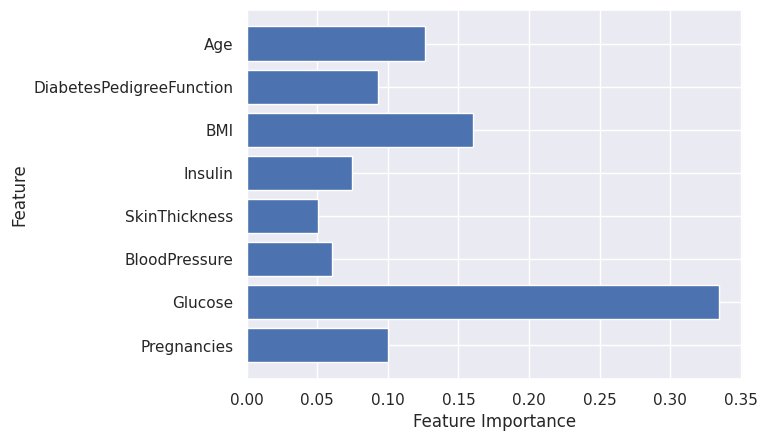

In [ ]:
custom_feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plot_feature_importances_custom(best_model_xgb, custom_feature_names)

# **Accuracy of All the Models**

In [ ]:
accuracy_models = {'Decision Tree' : [accuracy_DTC],
                   'Random Forest' : [accuracy_RF],
                   'AdaBoost' : [accuracy_Ada],
                   'LightGBM' : [accuracy_lgb],
                   'GradientBoosting' : [accuracy_gb],
                   'XGBoost' : [accuracy_xgb]}
accuracy_models_df = pd.DataFrame(accuracy_models)
accuracy_models_df

,Decision Tree,Random Forest,AdaBoost,LightGBM,GradientBoosting,XGBoost
0,0.733766,0.701299,0.746753,0.74026,0.694805,0.732759


# **Findings so far:**

It is clear from the outputs that,
only the features: 'Age', DiabatesPedigreeFunction', 'BMI', 'Glucose', and 'Pregnancies' are the most influencial.

Let's eliminate all the other less important features and build an ANN model with the rest for better accuracy.

In [ ]:
diabetes_df_shorter = diabetes_df.drop(columns=['Insulin', 'SkinThickness', 'BloodPressure'])
diabetes_df_shorter

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0
2,8,183,23.3,0.672,32,1
3,1,89,28.1,0.167,21,0
4,0,137,43.1,2.288,33,1
...,...,...,...,...,...,...
763,10,101,32.9,0.171,63,0
764,2,122,36.8,0.340,27,0
765,5,121,26.2,0.245,30,0
766,1,126,30.1,0.349,47,1


# **Artificial Neural Network (ANN) Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.regularizers import l2
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

In [ ]:
X = diabetes_df_shorter.drop('Outcome', axis=1)
y = diabetes_df_shorter['Outcome']

X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.3, random_state = rand)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size = 0.5, random_state = rand)

print(f'Training data shape:{X_train.shape}')
print(f'Corss-Validation data shape: {X_cv.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape:(537, 5)
Corss-Validation data shape: (115, 5)
Test data shape: (116, 5)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

In [ ]:
### Random Seeding

def set_random_seeds(seed_value=50):

    np.random.seed(seed_value)

    tf.random.set_seed(seed_value)

In [ ]:
### ANN model building

def ANN_model(reg):

    set_random_seeds()

    model_1 = Sequential(
        [
            Dense(2, activation='relu', kernel_regularizer=l2(reg)),
            Dense(4, activation='relu', kernel_regularizer=l2(reg)),
            Dense(1, activation='sigmoid')
        ],
        name='model_1'
    )

    model_2 = Sequential(
        [
            Dense(4, activation='relu', kernel_regularizer=l2(reg)),
            Dense(4, activation='relu', kernel_regularizer=l2(reg)),
            Dense(2, activation='relu', kernel_regularizer=l2(reg)),
            Dense(1, activation='sigmoid'),
        ],
        name='model_2'
    )

    model_3 = Sequential(
        [
            Dense(4, activation='relu', kernel_regularizer=l2(reg)),
            Dense(3, activation='relu', kernel_regularizer=l2(reg)),
            Dense(1, activation='sigmoid'),
        ],
        name='model_3'
    )

    model_list = [model_1, model_2, model_3]

    return model_list

In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_cv, y_cv, model_identity):
    model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    )

    print(f"Model's name: {model.name}..." +
         f"With Regularization: {reg}")
    model.fit(
                X_train, y_train,
                epochs=2000,
                verbose=0
    )

    model.save(f"{model_name}.keras")

    yhat_train = (model.predict(X_train) > 0.5).astype("int32")
    train_accuracy = accuracy_score(y_train, yhat_train)
    print(f"Training data Accuracy: {train_accuracy}")

    yhat_cv = (model.predict(X_cv) > 0.5).astype("int32")
    cv_accuracy = accuracy_score(y_cv, yhat_cv)
    print(f"CV data accuracy: {cv_accuracy}")


In [ ]:
regularization_strengths = [0, 0.01, 0.001]
saved_models = {}

for reg in regularization_strengths:
    models_with_reg = ANN_model(reg)


    for i, model in enumerate(models_with_reg):
        model_name = f"model_{i + 1}_reg_{reg}"
        train_and_evaluate_model(model, X_train_scaled, y_train, X_cv_scaled, y_cv, model_name)

        saved_models[model_name] = load_model(f"{model_name}.keras")

Model's name: model_1...With Regularization: 0
17/17 [==============================] - 0s 2ms/step
Training data Accuracy: 0.7821229050279329
4/4 [==============================] - 0s 3ms/step
CV data accuracy: 0.7304347826086957
Model's name: model_2...With Regularization: 0
17/17 [==============================] - 0s 2ms/step
Training data Accuracy: 0.8081936685288641
4/4 [==============================] - 0s 4ms/step
CV data accuracy: 0.7304347826086957
Model's name: model_3...With Regularization: 0
17/17 [==============================] - 0s 2ms/step
Training data Accuracy: 0.7914338919925512
4/4 [==============================] - 0s 5ms/step
CV data accuracy: 0.7304347826086957
Model's name: model_1...With Regularization: 0.01
17/17 [==============================] - 0s 2ms/step
Training data Accuracy: 0.7914338919925512
4/4 [==============================] - 0s 4ms/step
CV data accuracy: 0.7130434782608696
Model's name: model_2...With Regularization: 0.01
17/17 [================

# **Findings**
Based on the outputs, `model_1 With Regularization: 0.01`seems to work better.

In [ ]:
saved_models

{'model_1_reg_0': <keras.src.engine.sequential.Sequential at 0x79a45863f370>,
 'model_2_reg_0': <keras.src.engine.sequential.Sequential at 0x79a45a625390>,
 'model_3_reg_0': <keras.src.engine.sequential.Sequential at 0x79a45a59eb90>,
 'model_1_reg_0.01': <keras.src.engine.sequential.Sequential at 0x79a45a322bf0>,
 'model_2_reg_0.01': <keras.src.engine.sequential.Sequential at 0x79a4592cf130>,
 'model_3_reg_0.01': <keras.src.engine.sequential.Sequential at 0x79a459069840>,
 'model_1_reg_0.001': <keras.src.engine.sequential.Sequential at 0x79a4585a2770>,
 'model_2_reg_0.001': <keras.src.engine.sequential.Sequential at 0x79a458fd0e50>,
 'model_3_reg_0.001': <keras.src.engine.sequential.Sequential at 0x79a458d53c70>}

In [ ]:
selected_model = saved_models['model_2_reg_0.01']

print(f"Selected Model: {selected_model.name}")
yhat= (selected_model.predict(X_test_scaled) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, yhat)
print(f"Accuracy:{test_accuracy}")
test_precision =precision_score(y_test, yhat)
print(f"Precision:{test_precision}")
test_recall = recall_score(y_test, yhat)
print(f"Recall:{test_recall}")
test_f1 = f1_score(y_test, yhat)
print(f"F1 score:{test_f1}")

Selected Model: model_2
4/4 [==============================] - 0s 3ms/step
Accuracy:0.7586206896551724
Precision:0.7666666666666667
Recall:0.5227272727272727
F1 score:0.6216216216216216


In [ ]:
report = classification_report(y_test, yhat)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.90      0.82        72
           1       0.77      0.52      0.62        44

    accuracy                           0.76       116
   macro avg       0.76      0.71      0.72       116
weighted avg       0.76      0.76      0.75       116

